# Assignment 1: Two layer neural network
## Boyuan Yao 19307110202

In this assignment, we need to implement a neural network with two layers. This report is written by jupyter notebook. So for complete version of training and testing process, please read the readme file of my [github page](https://github.com/Cypher30/Computer_Vision) carefully!

In [1]:
# Some common setups
import numpy as np
from urllib import request
import gzip
import pickle
from data_utils import * # Data processing
from solver import * # Solver for updating the model
from twolayernet import * # The two layer net model
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
%load_ext autoreload
%autoreload 2

In [18]:
# Load the MNIST data

data = load_mnist()
for k, v in list(data.items()):
    print(('%s: ' % k, v.shape))

('X_train: ', (55000, 784))
('y_train: ', (55000,))
('X_val: ', (5000, 784))
('y_val: ', (5000,))
('X_test: ', (10000, 784))
('y_test: ', (10000,))


I randomly sample 5000 images from the original MNIST dataset to validation set to validate the goodness of trained model during trainning

## Part 1: Training
I have constructed the two layer network in the file ***twolayernet.py***. The network use the structure of one affine_ReLU layer (i.e. fully connected layer plus ReLU non-linear layer), and one fully connected layer to compute the final scores for each class. I use softmax loss for this network. The functions for each layer, including forward and backward propagation are in files ***layers.py*** and ***layers_utils.py***. The above three files also provide the option for different $L_2$ regularization strength.
The model training process is included in file ***solver.py***. In ***solver.py***, there is a Solver class provide lots of options for training, including verbose, learning rate and learning rate decay, store the best parameters, batchsize, etc. You could check the annotation in the file for further information.
In this part, I will show some of the experiment I've done for training part, including $L_2$ regularization and learning rate decay.

### Vanilla SGD optimizer
The vanilla SGD optimizer takes the small portion of the training set as a minibatch for gradient decent process, which could largely decrease the cost on each update. If the sample quality is good enough, it will be a good estimator for the whole training set so that the noise of the gradient could be controlled, therefore, we could expect a good quality of decent direction.
The *TwoLayerNet* is a class of two layer neural network. The input_size indicates the number of entries of each sample, the hidden_size indicates the number of hidden units of the single hidden layer, while the num_classes indicates how many classes are there for the training data. It also provide three other inputs, which are listed below

In [19]:
###################################################################
# This cell train the network with default vanilla SGD optimizer  #
# Other parameters of TwoLayerNet are listed here:                #
# - weight_scale: Scalar giving the standard deviation for random #
#   initialization of the weights. Default 1e-3                   #
# - reg: Scalar giving L2 regularization strength. Default 0.0    #
# - params: The parameters of the net, if the input is none,      # 
#   the nets will initialize the parameters using gaussian        # 
#   distribution. Defalut None                                    #
###################################################################
input_size = 784
hidden_size = 25
num_classes = 10
model = TwoLayerNet(input_size, hidden_size, num_classes)
solver = Solver(model, data, print_every=100)
# For more parameters information of Solver, please check README
# or python file solver.py.
solver.train()

(Iteration 1 / 2750) loss: 2.303461
(Epoch 0 / 10) train acc: 0.157836; val_acc: 0.160000
(Iteration 101 / 2750) loss: 0.537684
(Iteration 201 / 2750) loss: 0.314392
(Epoch 1 / 10) train acc: 0.907382; val_acc: 0.902200
(Iteration 301 / 2750) loss: 0.408070
(Iteration 401 / 2750) loss: 0.266661
(Iteration 501 / 2750) loss: 0.317935
(Epoch 2 / 10) train acc: 0.924745; val_acc: 0.919200
(Iteration 601 / 2750) loss: 0.160825
(Iteration 701 / 2750) loss: 0.265384
(Iteration 801 / 2750) loss: 0.208622
(Epoch 3 / 10) train acc: 0.935982; val_acc: 0.929000
(Iteration 901 / 2750) loss: 0.177482
(Iteration 1001 / 2750) loss: 0.238696
(Epoch 4 / 10) train acc: 0.941473; val_acc: 0.930200
(Iteration 1101 / 2750) loss: 0.148680
(Iteration 1201 / 2750) loss: 0.119916
(Iteration 1301 / 2750) loss: 0.129088
(Epoch 5 / 10) train acc: 0.951582; val_acc: 0.938600
(Iteration 1401 / 2750) loss: 0.223581
(Iteration 1501 / 2750) loss: 0.115703
(Iteration 1601 / 2750) loss: 0.108204
(Epoch 6 / 10) train acc:

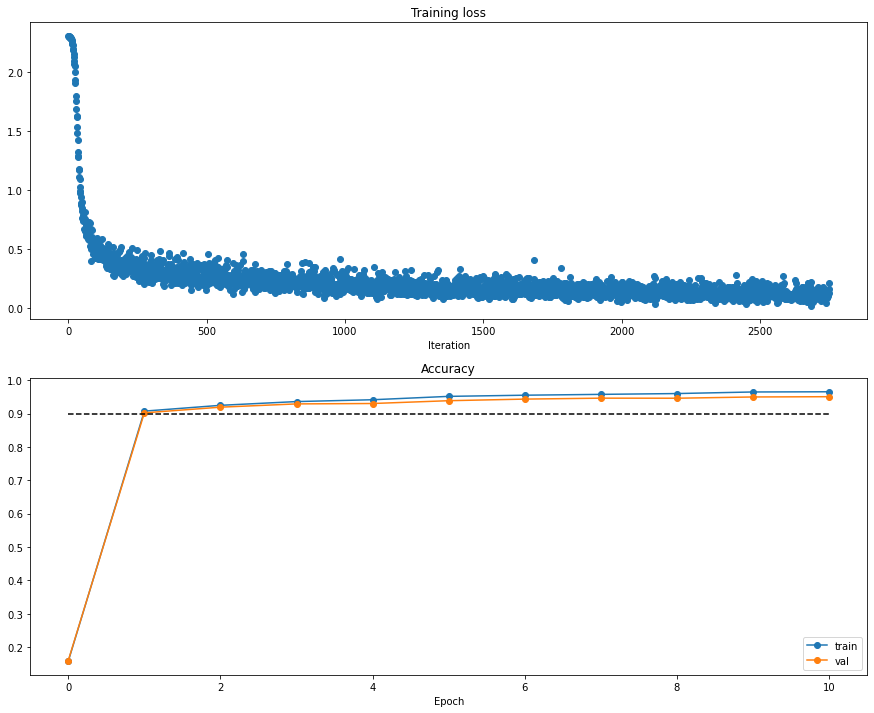

In [20]:
# Run this cell to visualize training loss and train / val accuracy

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.9] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

In [21]:
y_test_pred = np.argmax(solver.model.loss(data['X_test']), axis=1)
print('Test set accuracy: ', (y_test_pred == data['y_test']).mean())

Test set accuracy:  0.9579


We could see that, with vanilla SGD and a simple two layer network of 25 hidden units, the model could be trained to achieve more than 90% accuracy on both training and validation set, and achieve 95% percent of accuracy on the testing set! Moreover, we could see that there is just a tiny gap of performance between training set and validation set (even between testing set)

### $L_2$ regularization
In this part we will add the $L_2$ regularization and see how much we could improve the performance of the same network structure

In [23]:
input_size = 784
hidden_size = 25
num_classes = 10
# We apply a L2 regularization with strength 1e-3 here
model = TwoLayerNet(input_size, hidden_size, num_classes, reg=1e-3)
solver = Solver(model, data, print_every=100)
solver.train()

(Iteration 1 / 2750) loss: 2.301213
(Epoch 0 / 10) train acc: 0.173018; val_acc: 0.177400
(Iteration 101 / 2750) loss: 0.483021
(Iteration 201 / 2750) loss: 0.410383
(Epoch 1 / 10) train acc: 0.905782; val_acc: 0.902200
(Iteration 301 / 2750) loss: 0.260421
(Iteration 401 / 2750) loss: 0.317467
(Iteration 501 / 2750) loss: 0.305846
(Epoch 2 / 10) train acc: 0.923018; val_acc: 0.919600
(Iteration 601 / 2750) loss: 0.390154
(Iteration 701 / 2750) loss: 0.223889
(Iteration 801 / 2750) loss: 0.243108
(Epoch 3 / 10) train acc: 0.936145; val_acc: 0.929600
(Iteration 901 / 2750) loss: 0.189752
(Iteration 1001 / 2750) loss: 0.233605
(Epoch 4 / 10) train acc: 0.943200; val_acc: 0.935600
(Iteration 1101 / 2750) loss: 0.117093
(Iteration 1201 / 2750) loss: 0.203547
(Iteration 1301 / 2750) loss: 0.228696
(Epoch 5 / 10) train acc: 0.950255; val_acc: 0.939400
(Iteration 1401 / 2750) loss: 0.247449
(Iteration 1501 / 2750) loss: 0.123316
(Iteration 1601 / 2750) loss: 0.174251
(Epoch 6 / 10) train acc:

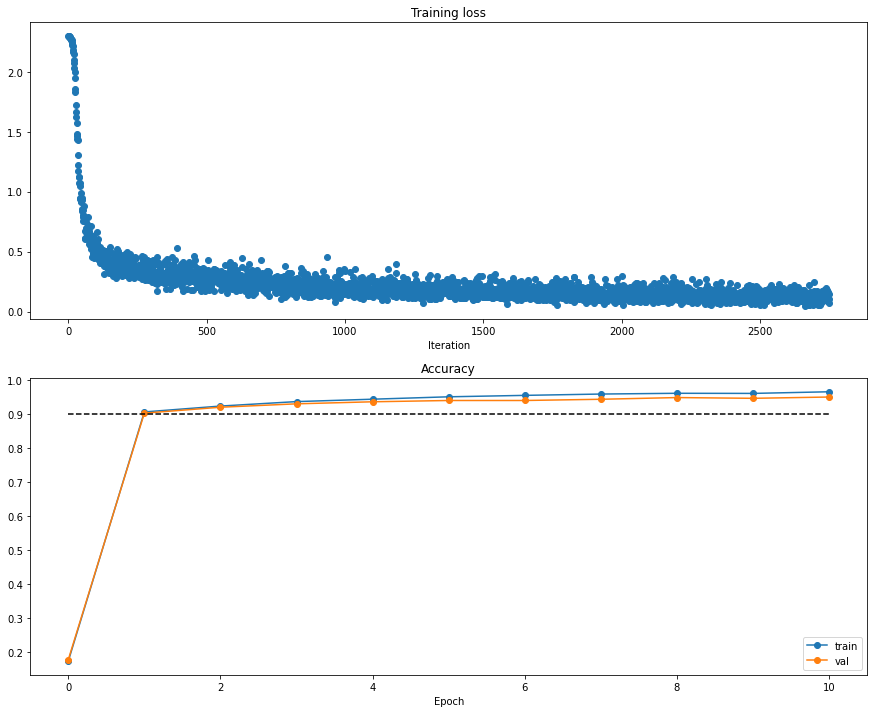

In [24]:
# Run this cell to visualize training loss and train / val accuracy

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.9] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

In [25]:
y_test_pred = np.argmax(solver.model.loss(data['X_test']), axis=1)
print('Test set accuracy: ', (y_test_pred == data['y_test']).mean())

Test set accuracy:  0.9584


We could see that there is no significant difference after we applying the $L_2$ regularization. Maybe it is because the whole dataset is just too simple.

### Learning rate decay
In this part we deploy learning rate decay to shrink at the end of every epoch.

In [26]:
input_size = 784
hidden_size = 25
num_classes = 10
model = TwoLayerNet(input_size, hidden_size, num_classes)
# We apply learning rate decay here
solver = Solver(model, data, print_every=100, lr_decay=0.99)
solver.train()

(Iteration 1 / 2750) loss: 2.303914
(Epoch 0 / 10) train acc: 0.103055; val_acc: 0.107800
(Iteration 101 / 2750) loss: 0.466196
(Iteration 201 / 2750) loss: 0.521015
(Epoch 1 / 10) train acc: 0.899055; val_acc: 0.895600
(Iteration 301 / 2750) loss: 0.300995
(Iteration 401 / 2750) loss: 0.294358
(Iteration 501 / 2750) loss: 0.216666
(Epoch 2 / 10) train acc: 0.921818; val_acc: 0.917400
(Iteration 601 / 2750) loss: 0.356315
(Iteration 701 / 2750) loss: 0.241202
(Iteration 801 / 2750) loss: 0.323336
(Epoch 3 / 10) train acc: 0.929909; val_acc: 0.921800
(Iteration 901 / 2750) loss: 0.196165
(Iteration 1001 / 2750) loss: 0.190757
(Epoch 4 / 10) train acc: 0.945400; val_acc: 0.938800
(Iteration 1101 / 2750) loss: 0.211531
(Iteration 1201 / 2750) loss: 0.260415
(Iteration 1301 / 2750) loss: 0.169976
(Epoch 5 / 10) train acc: 0.949418; val_acc: 0.939800
(Iteration 1401 / 2750) loss: 0.165259
(Iteration 1501 / 2750) loss: 0.114351
(Iteration 1601 / 2750) loss: 0.170198
(Epoch 6 / 10) train acc:

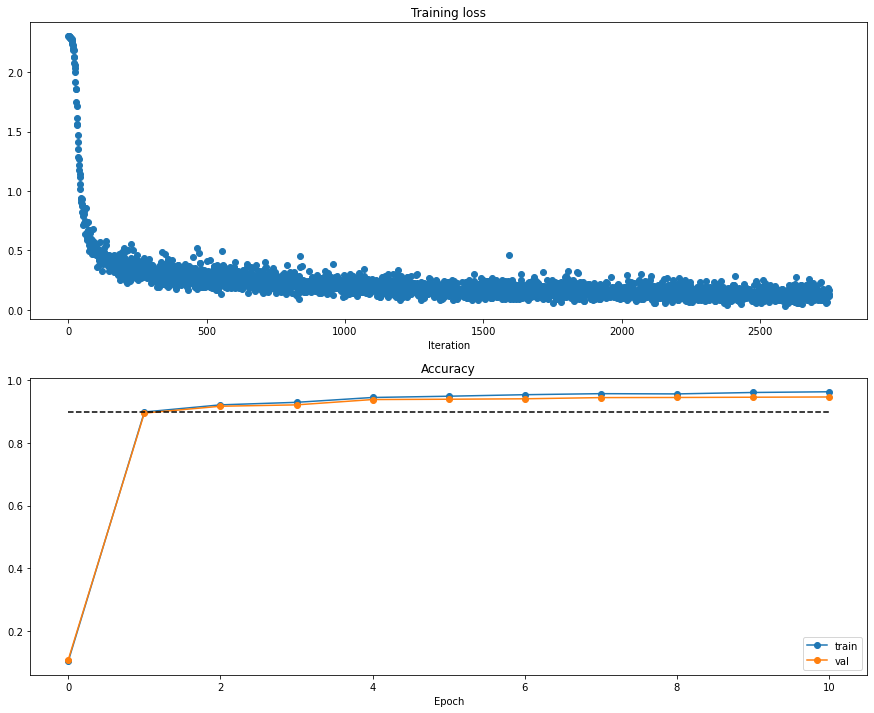

In [27]:
# Run this cell to visualize training loss and train / val accuracy

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.9] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

In [28]:
y_test_pred = np.argmax(solver.model.loss(data['X_test']), axis=1)
print('Test set accuracy: ', (y_test_pred == data['y_test']).mean())

Test set accuracy:  0.9573


We could see that compare to the vanilla one, there is also no significant boosting of the performance

## Part 2: Hyperparameters Searching
In this section, I will show you some simple unpacked codes of hyperparameters searching. In my github page you could find a packed version of this code, doing exactly the same things but you could do it all in command line.

In [29]:
input_size = 784
num_classes = 10

# Choice of hyperparameters
lr_rate = [5e-3, 2e-3, 1e-3]
hidden_units = [100, 256]
regs = [1e-2, 1e-3, 1e-4]
best_acc = 0.0
best_model = None
best_params = []

for lr in lr_rate:
    for units in hidden_units:
        for reg in regs:
            model = TwoLayerNet(input_size, 
                                units, 
                                num_classes, 
                                reg=reg)
            solver = Solver(model, 
                            data, 
                            optim_config={
                                'learning_rate': lr
                            },
                            verbose = False,
                            save_model = False,
                            num_epochs = 20,
                            lr_decay = 0.99)
            solver.train()
            print("=================================================")
            print("learning rate = %f, hidden units = %d\nregularization strength = %f, accuracy on val = %f"
                  % (lr, units, reg, solver.best_val_acc))
            print("=================================================")
            if solver.best_val_acc > best_acc:
                best_model = solver.model
                best_acc = solver.best_val_acc
                best_params = [lr, units, reg]

learning rate = 0.005000, hidden units = 100
regularization strength = 0.010000, accuracy on val = 0.957400
learning rate = 0.005000, hidden units = 100
regularization strength = 0.001000, accuracy on val = 0.952200
learning rate = 0.005000, hidden units = 100
regularization strength = 0.000100, accuracy on val = 0.958800
learning rate = 0.005000, hidden units = 256
regularization strength = 0.010000, accuracy on val = 0.965400
learning rate = 0.005000, hidden units = 256
regularization strength = 0.001000, accuracy on val = 0.975400
learning rate = 0.005000, hidden units = 256
regularization strength = 0.000100, accuracy on val = 0.977000
learning rate = 0.002000, hidden units = 100
regularization strength = 0.010000, accuracy on val = 0.975200
learning rate = 0.002000, hidden units = 100
regularization strength = 0.001000, accuracy on val = 0.973800
learning rate = 0.002000, hidden units = 100
regularization strength = 0.000100, accuracy on val = 0.975600
learning rate = 0.002000, hi

In [30]:
best_model.reg = 0.0
y_test_pred = np.argmax(best_model.loss(data['X_test']), axis=1)
print('Test set accuracy: ', (y_test_pred == data['y_test']).mean())
print("Best parameters:")
print("Learning rate:", best_params[0])
print("Hidden units:", best_params[1])
print("Regularization strength:", best_params[2])

Test set accuracy:  0.9796
Best parameters:
Learning rate: 0.002
Hidden units: 256
Regularization strength: 0.001


We could see that the with 256 hidden units, 1e-3 learning rate and 0.01 regularization strength, we get 97.96% accuracy on the test set. We could visualize the parameter with the following codes.

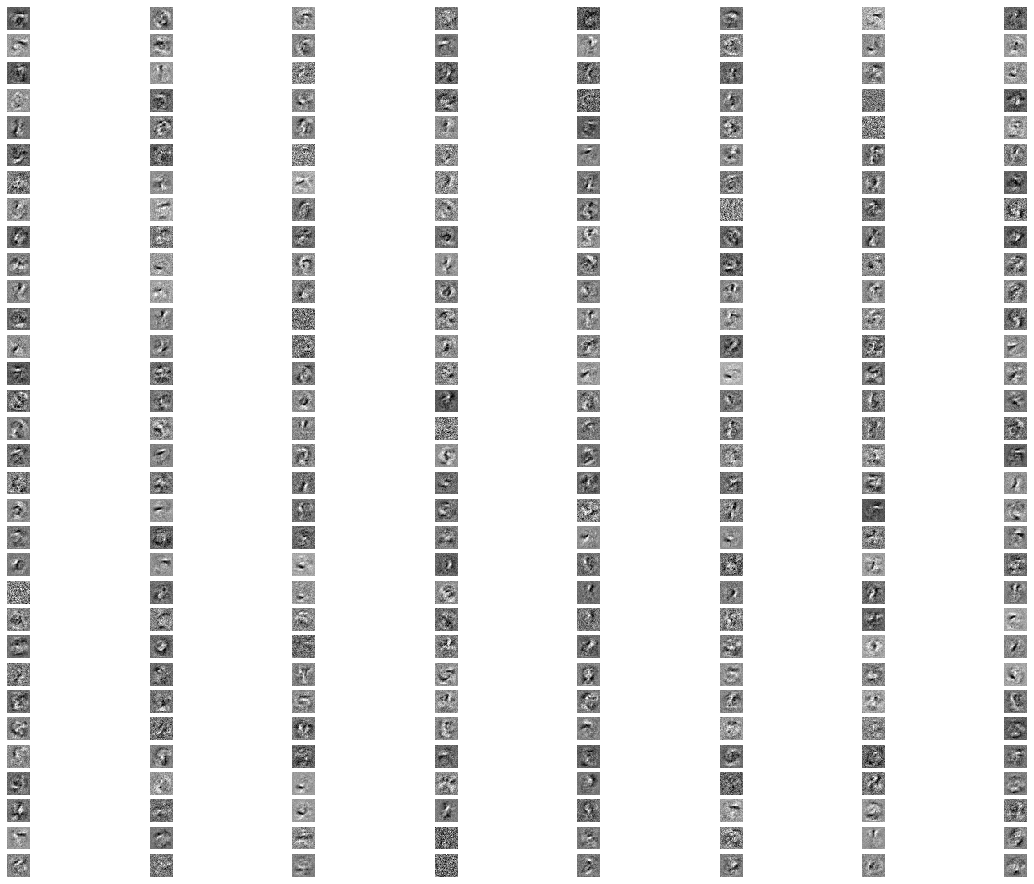

In [31]:
# Visualize the first weight
W1 = best_model.params['W1'].reshape(28, 28, -1).transpose(2, 0, 1)
plt.rcParams['image.cmap'] = 'gray'
num_row = (W1.shape[0] + 7) // 8
count = 0

for i in range(num_row):
    for j in range(8):
        plt.subplot(num_row, 8, count + 1)
        img = W1[count, :, :]
        img =  255.0 * (img - np.min(img)) / (np.max(img) - np.min(img))
        plt.imshow(img.astype('uint8'))
        plt.gca().axis('off')
        count = count + 1

plt.show()

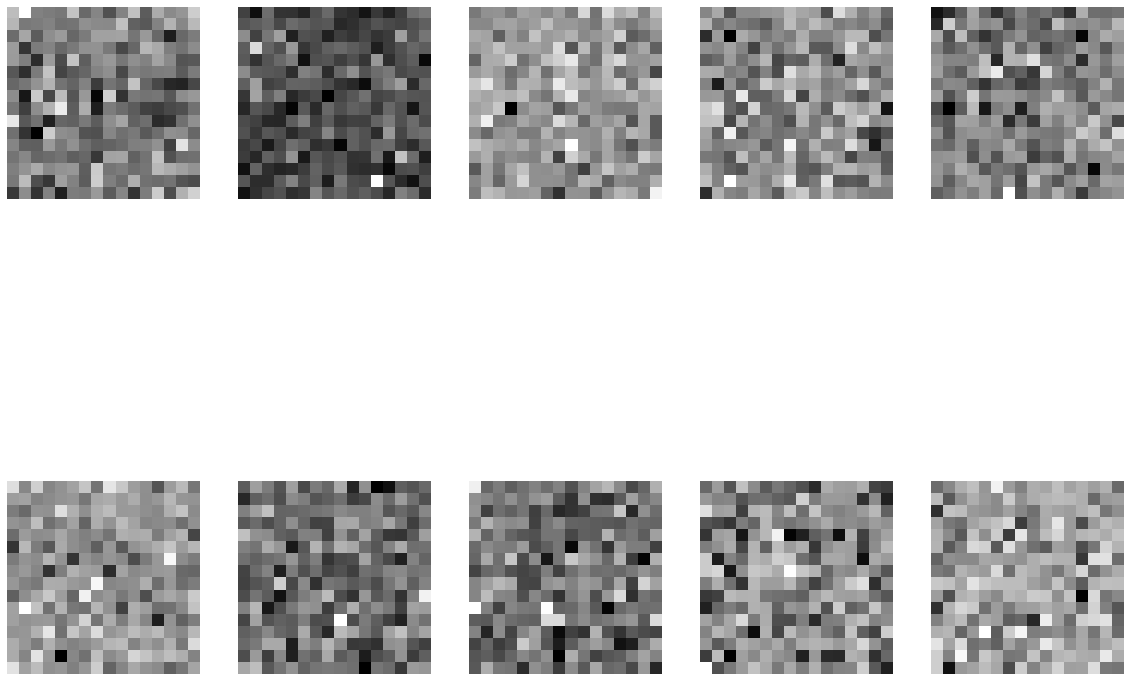

In [32]:
# Visualize the second weight
H = np.sqrt(best_model.params['W2'].shape[0]).astype('int')
W2 = best_model.params['W2'].reshape(H, H, -1).transpose(2, 0, 1)
plt.rcParams['image.cmap'] = 'gray'
count = 0

for i in range(2):
    for j in range(5):
        plt.subplot(2, 5, count + 1)
        img = W2[count, :, :]
        img =  255.0 * (img - np.min(img)) / (np.max(img) - np.min(img))
        plt.imshow(img.astype('uint8'))
        plt.gca().axis('off')
        count = count + 1

plt.show()

And we could save our parameters into the path we want using the following codes

In [33]:
np.save("best_model.npy", best_model.params)

## Part 3: Testing
In this part, we show that we could load the model we save, and test it on the testing set and output the accuracy

In [34]:
params = np.load("best_model.npy", allow_pickle=True).item()
model = TwoLayerNet(784, params['W1'].shape[1], 10, params=params)
y_test_pred = np.argmax(model.loss(data['X_test']), axis=1)
print('Test set accuracy: ', (y_test_pred == data['y_test']).mean())

Test set accuracy:  0.9796


We could see that the test accuracy is exactly the same as the above accuracy we get. I've upload the above parameters on my [github page](https://github.com/Cypher30/Computer_Vision) and also my [google drive](https://drive.google.com/file/d/1Y6MVH99k4Ui07HSMT1VRAGd4m1czcVTy/view?usp=sharing), feel free to download it!